# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv('clustering_kesejahteraan_masyarakat.csv')
data.head()

,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng,Cluster
0,ACEH,2015,11226,1900000.0,MAKANAN,PERKOTAAN,MARET,293697.0,466355.0,0
1,ACEH,2015,11226,1900000.0,MAKANAN,PERKOTAAN,SEPTEMBER,302128.0,466355.0,0
2,ACEH,2015,11226,1900000.0,MAKANAN,PERDESAAN,MARET,297479.0,395136.0,0
3,ACEH,2015,11226,1900000.0,MAKANAN,PERDESAAN,SEPTEMBER,306737.0,395136.0,0
4,ACEH,2015,11226,1900000.0,MAKANAN,PERDESAANPERKOTAAN,MARET,296406.0,415354.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4905 non-null   object 
 1   tahun     4905 non-null   int64  
 2   upah      4905 non-null   int64  
 3   ump       4905 non-null   float64
 4   jenis     4905 non-null   object 
 5   daerah    4905 non-null   object 
 6   periode   4905 non-null   object 
 7   gk        4905 non-null   float64
 8   peng      4905 non-null   float64
 9   Cluster   4905 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 383.3+ KB


In [4]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()
 
# List kolom kategorikal yang perlu di-encode
categorical_columns = ['provinsi', 'jenis', 'daerah', 'periode']
 
# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
 
# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data.head()

,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng,Cluster
0,0,2015,11226,1900000.0,0,2,0,293697.0,466355.0,0
1,0,2015,11226,1900000.0,0,2,1,302128.0,466355.0,0
2,0,2015,11226,1900000.0,0,0,0,297479.0,395136.0,0
3,0,2015,11226,1900000.0,0,0,1,306737.0,395136.0,0
4,0,2015,11226,1900000.0,0,1,0,296406.0,415354.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4905 non-null   int64  
 1   tahun     4905 non-null   int64  
 2   upah      4905 non-null   int64  
 3   ump       4905 non-null   float64
 4   jenis     4905 non-null   int64  
 5   daerah    4905 non-null   int64  
 6   periode   4905 non-null   int64  
 7   gk        4905 non-null   float64
 8   peng      4905 non-null   float64
 9   Cluster   4905 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 383.3 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
 
# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
 
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']
 
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3433, 9), y_train=(3433,)
Test set shape: X_test=(1472, 9), y_test=(1472,)


In [7]:
y_train = y_train.ravel()
y_test = y_test.ravel()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_21892\4217289235.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\Pongo\AppData\Local\Temp\ipykernel_21892\4217289235.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


In [8]:
# Pastikan y dalam format integer dan array 1D
y_train = y_train.astype(int).ravel()
y_test = y_test.astype(int).ravel()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### KNN

==== KNN Classifier ====
Confusion Matrix:
[[1126   24]
 [  86  236]]
True Positive (TP): 236
False Positive (FP): 24
False Negative (FN): 86
True Negative (TN): 1126
Accuracy: 0.9253
Precision: 0.9077
Recall: 0.7329
F1-Score: 0.8110

----------------------------------------



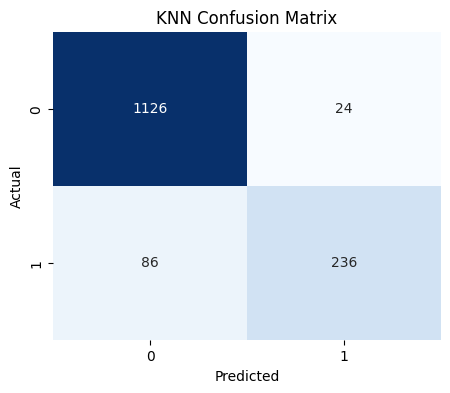

In [10]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

==== Decision Tree Classifier ====
Confusion Matrix:
[[1144    6]
 [   3  319]]
True Positive (TP): 319
False Positive (FP): 6
False Negative (FN): 3
True Negative (TN): 1144
Accuracy: 0.9939
Precision: 0.9815
Recall: 0.9907
F1-Score: 0.9861

----------------------------------------



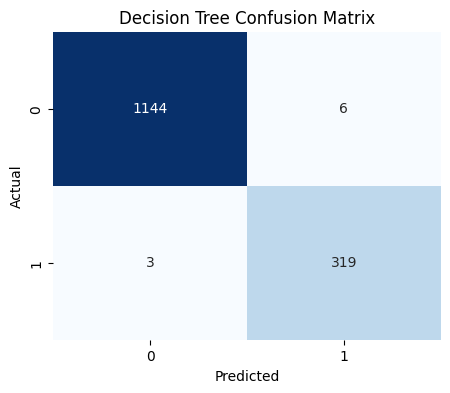

In [11]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

==== Random Forest Classifier ====
Confusion Matrix:
[[1144    6]
 [   4  318]]
True Positive (TP): 318
False Positive (FP): 6
False Negative (FN): 4
True Negative (TN): 1144
Accuracy: 0.9932
Precision: 0.9815
Recall: 0.9876
F1-Score: 0.9845

----------------------------------------



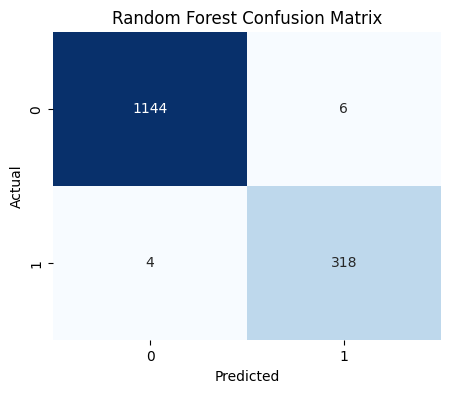

In [12]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### SVM

==== SVM Classifier ====
Confusion Matrix:
[[1141    9]
 [  34  288]]
True Positive (TP): 288
False Positive (FP): 9
False Negative (FN): 34
True Negative (TN): 1141
Accuracy: 0.9708
Precision: 0.9697
Recall: 0.8944
F1-Score: 0.9305

----------------------------------------



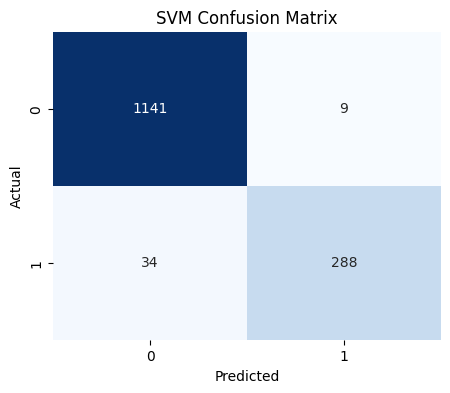

In [13]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Naive Bayes

==== Naive Bayes Classifier ====
Confusion Matrix:
[[1096   54]
 [  48  274]]
True Positive (TP): 274
False Positive (FP): 54
False Negative (FN): 48
True Negative (TN): 1096
Accuracy: 0.9307
Precision: 0.8354
Recall: 0.8509
F1-Score: 0.8431

----------------------------------------



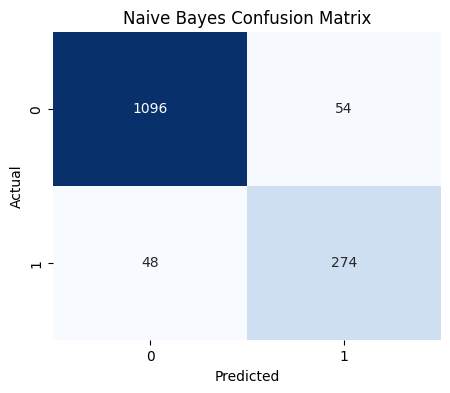

In [14]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Rangkuman Hasil

In [15]:
# Fungsi untuk mengevaluasi hasil dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp, = cm.ravel()
    results = {
        'Confusion Matrix': cm, 
        'True Positive (TP)': tp,
        'False Positive': fp,
        'False Negative': fn,
        'True Negative': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya 
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
}

# Buat DataFrame untuk meringkas hasil 
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
    })

# konversi daftar dictionary ke DataFrame 
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.925272   0.907692  0.732919  0.810997
1            Decision Tree (DT)  0.993886   0.981538  0.990683  0.986090
2            Random Forest (RF)  0.993207   0.981481  0.987578  0.984520
3  Support Vector Machine (SVM)  0.970788   0.969697  0.894410  0.930533
4              Naive Bayes (NB)  0.930707   0.835366  0.850932  0.843077


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### Random Search

#### Random Forest Tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int), 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f'Hasil terbaik: {random_search.best_params_}')
best_rf_random = random_search.best_estimator_



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Hasil terbaik: {'n_estimators': np.int64(400), 'min_samples_split': 2, 'max_depth': np.int64(20), 'criterion': 'gini'}


#### Decision Tree Tuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definisi parameter untuk RandomizedSearchCV
param_dist = {
    'max_depth': np.linspace(10, 50, 5, dtype=int), 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'splitter': ['best', 'random'],

}

dt_random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2,random_state=42)
dt_random_search.fit(X_train, y_train)

print(f'Hasil terbaik: {dt_random_search.best_params_}')
best_dt_random = dt_random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Hasil terbaik: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': np.int64(5), 'max_features': None, 'max_depth': np.int64(20), 'criterion': 'entropy'}


c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

### Bayesian Optimziation

In [18]:
from skopt import BayesSearchCV

# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': np.linspace(0, 0.05, 10)
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [19]:
from skopt import BayesSearchCV

# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'max_depth': np.linspace(10, 50, 5, dtype=int), 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': np.arange(1, 10, 1),  
    'splitter': ['best', 'random'],
}
 
# Inisialisasi BayesSearchCV
dt_bayes_search = BayesSearchCV(estimator=dt, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
dt_bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {dt_bayes_search.best_params_}")
best_dt_bayes = dt_bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

### Random Search Evaluasi

Accuracy: 0.99049
Precision: 0.98125
Recall: 0.97516
F1 Score: 0.97819

Confusion Matrix:
[[1144    6]
 [   8  314]]


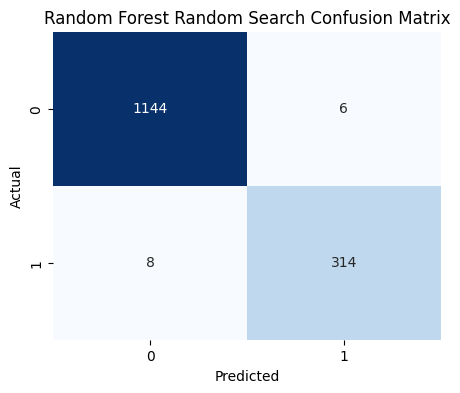

In [20]:
# Prediksi pada test set menggunakan model terbaik
y_pred_rf_random = best_rf_random.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf_random)
precision = precision_score(y_test, y_pred_rf_random)
recall = recall_score(y_test, y_pred_rf_random)
f1 = f1_score(y_test, y_pred_rf_random)

cm_rf = confusion_matrix(y_test, y_pred_rf_random)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_random))

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Random Search Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.98981
Precision: 0.96657
Recall: 0.98758
F1 Score: 0.97696

Confusion Matrix:
[[1139   11]
 [   4  318]]


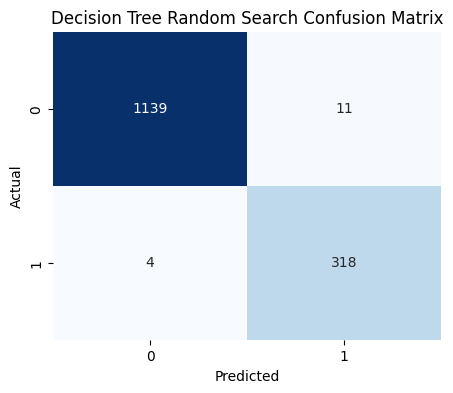

In [21]:
# Prediksi pada test set menggunakan model terbaik
y_pred_dt_random = best_dt_random.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_dt_random)
precision = precision_score(y_test, y_pred_dt_random)
recall = recall_score(y_test, y_pred_dt_random)
f1 = f1_score(y_test, y_pred_dt_random)

cm_dt = confusion_matrix(y_test, y_pred_dt_random)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_random))

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Random Search Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluasi Bayesian Optimization

Accuracy: 0.98913
Precision: 0.98113
Recall: 0.96894
F1 Score: 0.97500

Confusion Matrix:
[[1144    6]
 [  10  312]]


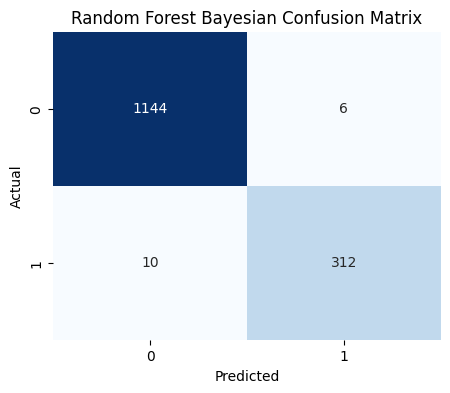

In [22]:
y_pred_rf_bayes = best_rf_bayes.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf_bayes)
precision = precision_score(y_test, y_pred_rf_bayes)
recall = recall_score(y_test, y_pred_rf_bayes)
f1 = f1_score(y_test, y_pred_rf_bayes)

cm_bayes = confusion_matrix(y_test, y_pred_rf_bayes)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_bayes))


plt.figure(figsize=(5, 4))
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Bayesian Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.99524
Precision: 0.98462
Recall: 0.99379
F1 Score: 0.98918

Confusion Matrix:
[[1145    5]
 [   2  320]]


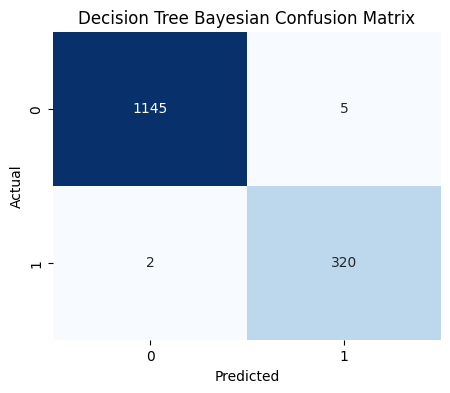

In [23]:
y_pred_dt_bayes = best_dt_bayes.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_dt_bayes)
precision = precision_score(y_test, y_pred_dt_bayes)
recall = recall_score(y_test, y_pred_dt_bayes)
f1 = f1_score(y_test, y_pred_dt_bayes)

cm_bayes = confusion_matrix(y_test, y_pred_dt_bayes)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_bayes))


plt.figure(figsize=(5, 4))
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Bayesian Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model sebelum dan sesudah tuning
results = {
    'DT Before Tuning': evaluate_model(dt, X_test, y_test),
    'DT After Random Search': evaluate_model(best_dt_random, X_test, y_test),
    'DT After Bayesian Optimization': evaluate_model(best_dt_bayes, X_test, y_test),
    'RF Before Tuning': evaluate_model(rf, X_test, y_test),
    'RF After Random Search': evaluate_model(best_rf_random, X_test, y_test),
    'RF After Bayesian Optimization': evaluate_model(best_rf_bayes, X_test, y_test),
}

# Konversi hasil evaluasi ke dalam DataFrame
summary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
    }
    for model_name, metrics in results.items()
])

# Tampilkan tabel perbandingan hasil
print(summary_df)


                            Model  Accuracy  Precision    Recall  F1-Score
0                DT Before Tuning  0.993886   0.981538  0.990683  0.986090
1          DT After Random Search  0.989810   0.966565  0.987578  0.976959
2  DT After Bayesian Optimization  0.995245   0.984615  0.993789  0.989181
3                RF Before Tuning  0.993207   0.981481  0.987578  0.984520
4          RF After Random Search  0.990489   0.981250  0.975155  0.978193
5  RF After Bayesian Optimization  0.989130   0.981132  0.968944  0.975000


setelah melakukan hyperparameter tuning. model Decision Tree menggunakan Bayesian Optimization terbilang memberi hasil yang lebih baik dengan hasil tuning lainnya. tidak terjadi kelemahan signifikan pada model ini, walupun hanya ada 98% untuk precision dan F1 score tapi masih tergolong angka yang sangat baik. 

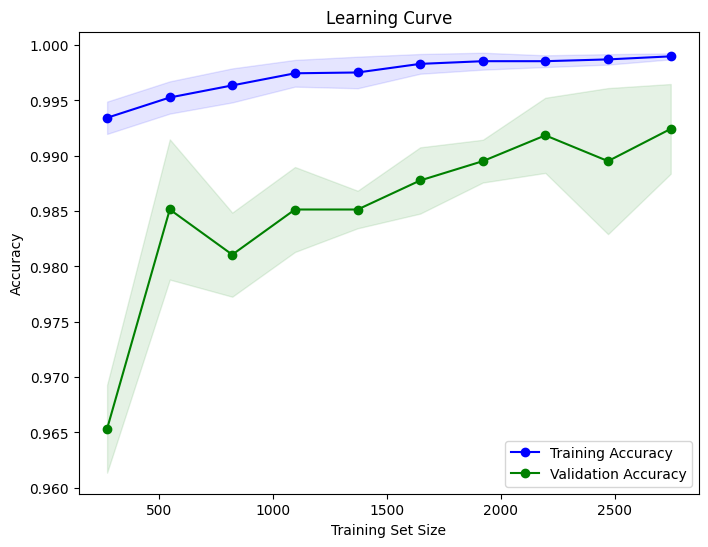

In [ ]:
from sklearn.model_selection import learning_curve

# 3. Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_dt_bayes, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# 4. Hitung rata-rata dan standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 5. Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Gap semakin berdekatan seiring bertambahnya data. jadi kedepannya dapat menambahkan data untuk hasil yang lebih optimal. dan dapat melakuakn hyperparameter tuning jika memungkinkan untuk model lain seperti KNN, SVM, dll. seperti yang telah saya latih di atas, tinggal butuh tuning saja. 